# PANDAS






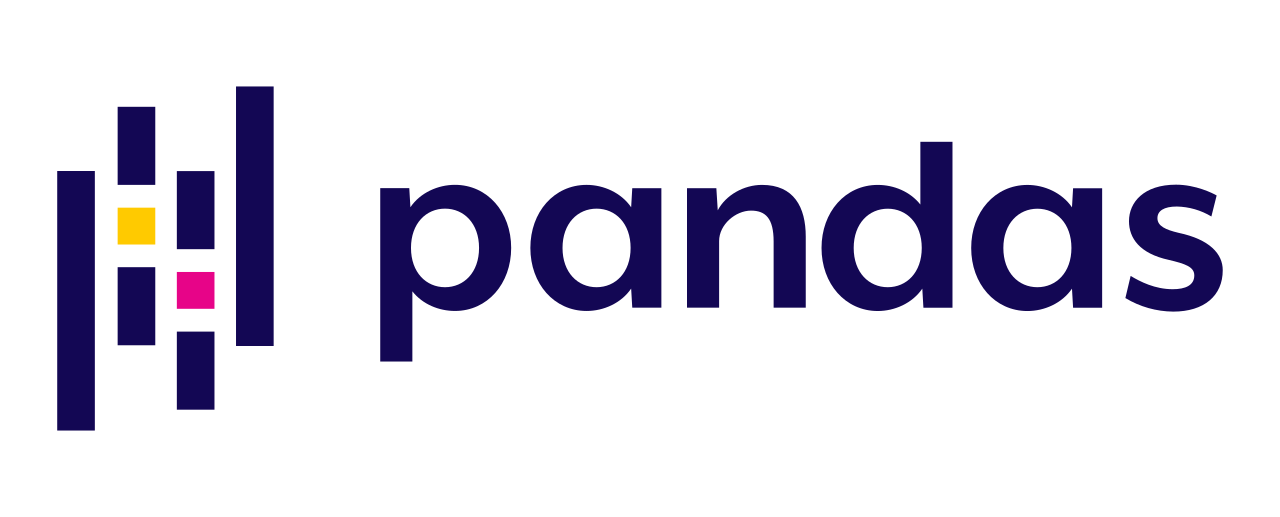

# **Introducción a Pandas**

**Pandas** es una librería de Python especializada en el m**anejo y análisis de estructuras de datos**. Es una herramienta potente, flexible y fácil de usar, que permite a los usuarios cargar, manipular y analizar datos de forma rápida y eficiente.

Pandas define dos estructuras de datos como las principales (más usadas):

* **Series:** Una serie es una estructura de datos unidimensional que representa un array o lista de datos (una fila/columna que extraigamos de una tabla)
* **DataFrames:** Un DataFrame es una estructura de datos bidimensional que representa una tabla de datos.



Para poder utilizar la librería, en primer lugar es necesario importarla:

In [ ]:
# "pd" es el alias corto mundialmente utilizado
import pandas as pd

# NumPy nos va a hacer falta en algún momento
import numpy as np



\

# **Estructuras de datos en Pandas**




## **Series** <pd.Series()>


Una serie es una estructura de datos unidimensional que representa un array o lista de datos. Las series se pueden crear a partir de una lista, un rango o un diccionario.

Una **serie** es como un vector **unidimensional** con **etiquetas (índice)** que contiene unos datos **homogéneos (del mismo tipo)**. Lo podemos ver como una de las columnas que van a componer una tabla.

Veamoslo con ejemplos

In [ ]:
# a partir de una lista
mi_serie = pd.Series([1, 1, 2, 3, 5])

print(mi_serie)


In [ ]:
notas = pd.Series([1.5, 3.5, 4.75])

print(notas)


In [ ]:
type(notas)

Si intentamos crear una serie con datos de diferentes tipos, podremos hacerlo, ya que pandas creará una serie con el tipo más general:


In [ ]:
# Mezclamos enteros y floats, la serie es de tipo float.
print(pd.Series([1, 2, 3.5]))

In [ ]:
# Mezclamos enteros, floats y strings, la serie es de tipo object, para Python al final todo es un objeto
print(pd.Series([1, 4.3, "data"]))

Las Series disponen de **índice**, útil para etiquetar a la información y acceder a la misma. Si no lo especificamos crea uno de enteros (ver ejplos arriba la primera columna)

In [ ]:
notas

In [ ]:
notas[2]

In [ ]:
# lo podemos especificar en el parámetro "index":

notas2 = pd.Series([5.6,2.7,8.3], index=['Pepe','Ana','María'])

notas2

In [ ]:
# o a partir de un diccionario, el índice lo forman las claves del mismo:
notas3 = pd.Series({'Paula': 5.6, 'Antonio': 7.25, 'Lola': 3.9})

notas3

In [ ]:
print(notas2['Ana'])

print(notas3['Antonio'])

# el índice es un "atributo" de una serie, podemos obtenerlo
print(notas3.index)


In [ ]:
notas3[2]

\


## **DataFrames** <pd.DataFrame()>

Un **DataFrame** es una **estructura de datos bidimensional** que representa una **tabla de datos**. El _dataframe_ es la estructura principal de trabajo con la librería pandas.

Los atributos principales de una tabla son el índice (frecuentemente definido sólo en determinados casos como las series temporales) y las columnas que lo forman.

Los DataFrames se pueden crear a partir de una lista de listas, un diccionario de listas, leyendo de un archivo de datos (lo veremos más adelante) o especificando el índice y las columnas.

In [ ]:
# mediante diccionario (las claves son los nombres de las columnas)

registro_trafico = pd.DataFrame({'tipo_vehiculo': ['turismo','furgoneta','motocicleta'],
                                 'n_pasajeros': [5,9,2],
                                 'color': ['rojo', 'azul', 'negro']})

registro_trafico

In [ ]:
# especificando datos y columnas (pudieramos tb haberlo hecho con el índice)

registro_trafico2 = pd.DataFrame(data= [['turismo', 5, 'verde'], ['motocicleta',2,'gris']], columns=['tipo_vehiculo', 'n_pasajeros', 'color'])

registro_trafico2

De nuevo las **columnas** son un **atributo del Dataframe**:



In [ ]:
registro_trafico.columns

Podemos **acceder a una columna o columnas** como estabamos acostumbrados con listas y arrays, **utilizando corchetes ([])**

In [ ]:
registro_trafico['tipo_vehiculo']

In [ ]:
# para varias columnas entre corchetes interiores:

registro_trafico[['tipo_vehiculo','n_pasajeros']]


Si el **nombre de una columna no contiene espacio** (buena práctica), se puede llamar como si fuera un atributo del dataframe, **con el punto (.) seguido del nombre de la columna**:


In [ ]:
registro_trafico.color

Otro atributo al que podemos acceder es a los tipos de las columnas **dtypes**:

In [ ]:
registro_trafico.dtypes

In [ ]:
type(registro_trafico.dtypes)

\

A modo de comentario podemos ver como resultado siguiente la conexión dentro de las librerías de datos entre Pandas y Numpy. Para ello nos valemos de otro atributo: **"values"** que devuelve solo los valores (lo de "dentro" de la tabla)


In [ ]:
print(notas, '\n'*2)

print(notas.values)

In [ ]:
type(notas.values)

In [ ]:
print(registro_trafico, '\n'*2)

print(registro_trafico.values)



In [ ]:
print(type(registro_trafico.values))

print(registro_trafico.values.shape)


In [ ]:
# cuando seleccionamos una columna se nos devuelve como Serie

print(type(registro_trafico.color))

\



# Lectura de datos desde un fichero.

Pandas proporciona una serie de funciones para leer datos de diferentes fuentes.

**Lectura de datos**

Pandas puede leer datos de una variedad de fuentes, incluyendo:

* Archivos CSV: *pd.read_csv()*           delimitador ","
* Archivos de texto: (muy común usar tambien read_csv) *pd.read_table()*    delimitador "\t"
* Archivos Excel: *pd.read_excel()*       especificar hoja(pestaña),columnas ...
* Otros formatos ...

Estos métodos disponen de multitud de parámetros para configurar con todo detalle cómo realizar la importación (siempre es buena idea echar un vistazo a la ayuda). Si bien para la mayoría de las ocasiones la configuración por defecto ya nos ofrecerá los resultados deseados.

Vamos a **cargar** como ejemplo el **archivo** **sales.csv**. 

(NOTA: el archivo se encuentra en la plataforma, lo teneis que descargar primero a vuestro ordenador)


In [ ]:
# Cargamos los datos del fichero
ruta = './sales.csv'

df_sales = pd.read_csv(ruta)

print(type(df_sales))

df_sales


Vemos al final que tiene 100 mil registros (filas) y 8 columnas:

In [ ]:
# podemos tener las columnas en forma de lista  en vez de un objeto "Indice" (por defecto)
df_sales.columns.to_list()


**Cuestiones importantes a tener en cuenta:**

- Echar un vistazo a los datos preferiblemente en crudo, como texto plano (click boton dcho ---> Abrir con ...  Bloc de notas)
Con esto identificamos delimitador de columnas, si hay cabecera, si hay que saltar lineas de comentario....

- Elegir cual de los métodos (como mencionamos anteriormente) utilizar y en consecuencia del punto anterior los parámetros que debemos especificar para una lectura correcta.

Veamos un ejemplo con el archivo **"desordenado.txt"**

In [ ]:
!cat 'desordenado.txt'

In [ ]:
df_desordenado = pd.read_table('./desordenado.txt', \
                               skiprows=3, sep=";", header=None, names=['nro_planchas', 'grosor', 'largo', 'ancho'])

df_desordenado

\

# Operaciones básicas

## Exploración del _dataframe_

Podemos ver las primeras o últimas filas (registros) de nuestro DF, mediante los métodos **head()** y **tail()** respectivamente. Podemos especificar entre paréntesis el número de filas:

In [ ]:
df_sales.head()

In [ ]:
df_sales.tail(3)

También tenemos la opción de obtener una muestra aleatoria, por ejemplo en tablas ordenadas para ver datos variados.

Utilizaremos el método **sample**, al que le tenemos que indicar bien el nº de filas (parámetro "n") o bien una fracción sobre el total (parámetro "frac", por ejemplo 0.5 para la mitad de la tabla):

In [ ]:
# fijaros en la visualización en los índices a la izquierda, muestra aleatoria

df_sales.sample(n=20)


\

Disponemos también del método **"info"**, que nos da información de las filas (Index), columnas y su tipo, uso en memoria, no-nulos por columna:

In [ ]:
df_sales.info()

Otra opción es el método **describe()** que da un resumen estadístico de las columnas, si bien por defecto solo muestra la de las variables numéricas:

In [ ]:
df_sales.describe()

Si bien podemos especificar en el **parámetro include** los tipos de las columnas de las que queremos esa información.

Así las columnas de tipo cadena (en pandas aparecen como "Object") alguna veces se corresponden con variables discretas, categóricas. Veamos la información que se muestra en este ejemplo.

In [ ]:
df_sales.columns

In [ ]:
df_sales.describe(include=[object])

Podemos obtener **determinados valores de una columna tipo categórico** con los métodos **"unique"** y **"value_counts"**:

In [ ]:
# ¿cuantos regiones hay? ¿Cuales son?

df_sales.Region.unique()

In [ ]:
len(df_sales.Region.unique())

In [ ]:
# Nº de pedidos por Región, podemos ordenar con parámetro "ascending"

df_sales.Region.value_counts(ascending=False)

In [ ]:
# con el parámetro "normalize" nos devuelve proporción, y de ahi podemos obtener porcentaje:

df_sales.Region.value_counts(normalize=True)

In [ ]:
df_sales.Region.value_counts(normalize=True) * 100

\

## Indexación y selección de datos


**Podemos utilizar las expresiones habituales de Python (y NumPy)** para seleccionar datos de _dataframes_ **o bien usar los operadores propios de pandas**. Estos últimos están optimizados, por lo que su uso es recomendado para trabajar con conjuntos de datos grandes o en situaciones donde la eficiencia sea crítica.

### **Expresiones comunes**

In [ ]:
# Primero seleccionamos las columnas como ya sabemos, despues especificamos
# un rango de filas

df_sales[['Item_Type','Units_Sold','Country']][0:5]

O podemos utilizar **indexado lógico, especificando la condición que deben cumplir las filas a recuperar** (se puede a continuación elegir igual que antes las columnas):

**OJO: para condiciones compuestas emplear (&) para "and", (|) para "or" y la virulilla (~) para "not"**

In [ ]:
df_sales[(df_sales.Country=="Belize") & (df_sales.Units_Sold>5000)][['Country','Item_Type','Units_Sold']]

\

### **Operadores propios**: "loc[]"; "iloc[]"

Con **"loc[ ]"** podemos especificar filas (si hay definido índice y si no numérico) y columnas por su nombre directamente. Podemos también especificar rangos o solo determinados valores (entre corchetes) para esas filas y columnas, y también indexado lógico. Es una **opción más completa**:

In [ ]:
# una celda determinada

df_sales.loc[100, 'Region']

In [ ]:
# un rango de filas y determinadas columnas

df_sales.loc[:10,['Country', 'Units_Sold']]

In [ ]:
df_sales.columns

In [ ]:
df_sales.loc[:5,'Item_Type':'Region']

In [ ]:
# especificar una condición para las filas (registros) a recuperar

df_sales.loc[(df_sales.Region=='Asia') & (df_sales.Units_Sold<10),:]

Con **"iloc[ ]"** solo podemos utilizar números (valor, rangos, listas) para indicar las filas y columnas (numeradas por orden de aparición en el DF):

In [ ]:
df_sales.head(10)

In [ ]:
# una celda
df_sales.iloc[4,2]


In [ ]:
# filas por rango y columnas por lista (todo numeros)

df_sales.iloc[0:5,[2,3,5]]


\

# Manipulación de datos: Transformación

## Operaciones básicas de columna

Podemos **asignar valores a las columnas** (coherentes con su longitud). Para **crear una columna nueva** basta con especificar el nombre de la nueva columna y asignar un valor:

In [ ]:
df_desordenado

In [ ]:
# creamos (añadimos) nueva columna
df_desordenado['Enviado'] = [True, False, True]

df_desordenado

In [ ]:
df_desordenado['superficie'] = df_desordenado.largo * df_desordenado.ancho

df_desordenado

La nueva columna puede ser también resultado de un campo calculado a partir de otra u otras columnas. Lo veremos más adelante.

\

Con el método **"drop"** podemos eliminir una columna o columnas (podemos también eliminar filas).

Un parámetro a tener en cuenta es **"inplace"** (booleano, presente también en otros métodos), que realiza la modificación en el propio DF y no devuelve ningún valor (True). Para (False), valor por defecto, deja intacto el DF original y devuelve uno con la modificación:

In [ ]:
# comportamiento parámetro "inplace" False (por defecto)
df_resumen = df_desordenado.drop(columns=['Enviado'])

df_resumen

In [ ]:
df_desordenado

In [ ]:
df_desordenado.drop(columns=['Enviado'], inplace=True)

df_desordenado

Podemos también cambiar el tipo de dato de una columna (método Series) o columnas (método Dataframe) con el método **"astype"**. Podemos especificar un tipo de datos de Python o de [numpy.dtype](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).

Este método por defecto devuelve una copia.

In [ ]:
# echemos un vistazo a los tipos de las columnas
df_desordenado.dtypes



In [ ]:
# por los datos iniciales pandas "dedujo" que el largo y el ancho eran enteros
# lo mas correcto es pasarlo a decimal (float)
# especificamos columna y nuevo tipo como elementos de un diccionario

df_conversion = df_desordenado.astype({'largo': float, 'ancho': float})

df_conversion.dtypes


\

## Operaciones básicas de fila

Para **añadir una fila o filas** recurrimos al método de pandas **"concat"**, creando primero un DF con la fila o filas a añadir para al final unirlo al original.

Es interesante señalar que con el valor por defecto (0) para el parámetro "axis" añadimos filas, pero de forma similar a lo explicado podemos añadir columnas si asignamos un (1).

Volviendo a nuestro caso de añadir filas:

In [ ]:
df_desordenado

In [ ]:
df_nuevos = pd.DataFrame([[20, 0.010, 3, 3, True], [5, 0.020, 15, 8, False], [1, 0.030, 18, 15, True]],
                           columns=['nro_planchas', 'grosor', 'largo', 'ancho', 'Enviado'])

df_planchas_act = pd.concat([df_desordenado,df_nuevos], ignore_index=True)

df_planchas_act

\

Para borrar filas nos valemos del método ya conocido **"drop"**, especificando el nº (indice, parámetro "index") de aquellas filas que queremos eliminar.

In [ ]:
# podemos borrar filas identificandolas por el índice:

df_planchas_act.drop(index=[3], inplace=True)

df_planchas_act

A veces queremos **borrar filas que cumplan una condición**. Para ello debemos primero seleccionarlas (indexado lógico) y luego usar el método "index" del resultado como entrada de "drop" (parámetro del mismo nombre)

In [ ]:
# eliminar los registros de planchas de 0.030
# primer paso

idx = df_planchas_act[df_planchas_act.grosor==0.030].index

idx


In [ ]:
# finalmente

df_planchas_act.drop(index=idx, inplace=True)

df_planchas_act


In [ ]:
df_planchas_act.reset_index()

In [ ]:
df_planchas_act.columns

\

## Cálculos con columnas

Podemos realizar **operaciones aritmeticas con una columna o entre columnas**, así como utilizar métodos de **numpy**.

Es frecuente crear otra columna del DF con el resultado de estas operaciones (**campos calculados**):



In [ ]:
# por ejemplo si queremos pasar el grosor a cm.

df_planchas_act.grosor = df_planchas_act.grosor * 100

df_planchas_act


Volvemos al DF "sales":


In [ ]:
df_sales

Podemos crear un campo calculado (columna) **Total_Price** mediante las columnas "Units_Sold" y "Unit_Price":

In [ ]:
df_sales['Total_Price'] = df_sales['Units_Sold'] * df_sales['Unit_Price']

df_sales

Y calcular a modo de exploración la media de esta nueva columna:

In [ ]:
np.mean(df_sales.Total_Price)

\

In [ ]:
df_sales.columns


In [ ]:
df_sales['etiqueta'] = df_sales.Region + '_' + df_sales.Country

df_sales.head()

## Métodos "apply" y "applymap"

Los métodos **"apply" y "applymap"** nos sirven para poder aplicar funciones sobre una columna o columnas o un Dataframe.

### Apply()

El método **`apply`** se utiliza para **aplicar una FUNCIÓN a los elementos de un DataFrame o una Serie** (se aplica a las filas o columnas, especificando parámetro "axis", por defecto a las columnas).

La **función** puede ser c**ualquier función Python que tome como entrada una Serie (fila o columna) y devuelva un solo valor (simple/compuesto) como salida**.

El método `apply` tiene dos argumentos obligatorios:

* `func`: Una función Python que se aplicará a los elementos del DataFrame o la Serie.
* `axis`: Un entero que indica el eje a lo largo del cual se aplicará la función. Los valores posibles son 0 (columnas) y 1 (filas).

El método `apply` devuelve un DataFrame o una Serie con los resultados de la función aplicada a los elementos. Veamoslo con ejemplos:




In [ ]:
# Nos creamos un dataframe de columnas numéricas con valores al azar
# sobre alumnos de un curso de bachillerato

np.random.seed(42)

datos_alumnos = pd.DataFrame({'altura': np.random.normal(175,8, size=5),
                              'peso': np.random.normal(80,5, size=5)})

datos_alumnos

Primero queremos dejar todas las medidas con un solo decimal (aplicar la operación a todas las columnas):


In [ ]:
# OJO: "np.round" aparte del numero a redondear (aqui los de cada columna)
# tiene el parámetro "decimals" para especificar el nº de decimales

datos_redondeados = datos_alumnos.apply(np.round, decimals=1)

In [ ]:
datos_redondeados

Lo pensamos mejor y queremos la altura en metros en vez de centímetros, con dos decimales.

In [ ]:
# son varias operaciones, tendremos que construirnos una función

def conversion_altura(serie):
  serie = serie / 100
  salida = np.round(serie, decimals=2)
  return salida



In [ ]:
# ahora la "aplicamos" a la altura

datos_redondeados.altura = datos_redondeados.altura.apply(conversion_altura)

datos_redondeados


Ahora que tenemos la altura en metros y el peso en kg, podríamos calcular el Índice de Masa Corporal (IMC): IMC = peso (kg)/ [estatura (m)]^2.

Esta vez aplicaríamos una función a las filas (axis = 1):


In [ ]:
# creamos la función:

def calculo_IMC(serie):
  imc = serie[1] / (serie[0])**2

  return np.round(imc,1)


In [ ]:
datos_redondeados.apply(calculo_IMC, axis=1)


Podemos añadirla como columna al DF:

In [ ]:
datos_redondeados['IMC'] = datos_redondeados.apply(calculo_IMC, axis=1)

datos_redondeados

In [ ]:
df_sales.columns

In [ ]:
df_sales.info()

In [ ]:
# una variante, pongo como parámetro el % de impuesto, es decir si "4%" le paso como parámetro "4"
def igic_apply(serie, imp):
    return serie * (1+imp/100)


In [ ]:
df_sales.Unit_Price.apply(igic_apply, imp=10)

In [ ]:
# más sencillo, sabemos el impuesto (no cambia), en este caso 7%, por lo que un incremento lo obtengo multiplicando por 1.07
# devuelvo el resultado redondeado a 2 decimales (centimos)

def igic_apply2(serie):
    imp = serie * 1.07
    return np.round(imp,2)



In [ ]:
df_sales.Unit_Price.apply(igic_apply2)

\

### Applymap()

El método **`applymap`** se utiliza para **aplicar una FUNCIÓN a los ELEMENTOS de un DataFrame.** La función debe tomar un solo valor como entrada y devolver un único valor como salida.

El método `applymap` tiene un solo argumento obligatorio:

* `func`: Una función Python que se aplicará a los elementos del DataFrame.

El método `applymap` devuelve un DataFrame con los resultados de la función aplicada a los elementos.

In [ ]:
# creamos un DF de numeros en un rango

df_ejemplo = pd.DataFrame({'A': [1,4,9], 'B': [64,81,100]})

df_ejemplo

Queremos sus raices cuadradas:

In [ ]:
df_ejemplo.applymap(np.sqrt)

\

## Ordenar una Serie o Dataframe

El método **`sort_values()`** se utiliza para ordenar los valores de una Serie o DataFrame.

La diferencia consiste en que **para un Dataframe**, el método `sort_values()` ordena los valores de la Serie de acuerdo con lo establecido en el parámetro `by` (columnas). **Para una Serie** simplemente ordena sus valores.

El parámetro `ascending` especifica si los valores se deben ordenar en orden ascendente (`True`) o descendente (`False`). También dispone de parámetro "inplace".

Veamos algunos ejemplos con nuestro dataframe "sales". Para notar mejor el efecto trabajaremos sobre una muestra:


In [ ]:
sales_muestra = df_sales.sample(n=20, random_state=42)

sales_muestra

In [ ]:
# vamos a ordenar por unidades vendidas descendente:

sales_muestra.sort_values(by='Units_Sold', ascending=False)

In [ ]:
# podemos ordenar por más de un campo, especificandolos entre corchetes:

sales_muestra.sort_values(by=['Region','Country'])

In [ ]:
# y atendiendo a distintos criterios:

sales_muestra.sort_values(by=['Country', 'Units_Sold'], ascending=[True, False])

# Manipulación de datos: Limpieza del conjunto de datos

## Eliminar duplicados

Podemos conocer el nº de lineas (registros) duplicadas de un DF mediante el método **"duplicated"**. Nos devuelve una serie booleana, como una máscara, señalando con True aquellas filas duplicadas. Batará con aplicar una suma (sum())

Para eliminarlas utilizamos el método **"drop_duplicates"** (parámetro inplace).

In [ ]:
df_sales.duplicated().sum()

 Para ver un ejemplo nos creamos un DF corto:


In [ ]:
datos = {'Nombre': ['Ana', 'Julian', 'Pedro', 'Ana'],
         'Apellidos': ['Garcia', 'Pelaez', 'Montes', 'Garcia'],
         'Sueldo': [1400, 1250, 1500, 1400],
         'Activo': [True, True, False, True]}

df_duplicados = pd.DataFrame(datos)

df_duplicados



In [ ]:
# Observar la salida
df_duplicados.duplicated()

In [ ]:
df_duplicados.duplicated().sum()

In [ ]:
# vamos a eliminar el duplicado

df_duplicados.drop_duplicates(inplace=True)

df_duplicados

\

## Valores nulos

**En la vida real es frecuente encontrarnos con valores nulos**, debido a errores en la captación, valores no aplicables, etc.



### Detectar nulos

Podemos detectar los valores nulos indistintamente con los métodos de DF **"isna()"** e **"isnull()**. Los valores nulos identificados son los de Python (palabra clave "None") y el definido en Numpy (numpy.NaN)

Ambos devuelven una máscara booleana de las mismas dimensiones del DF, con valor "True" en las celdas con nulos. **Para obtener los nulos por columnas le añadiremos "sum()"**

Como ejemplo vamos a partir de un DF anterior al que le vamos a añadir unas filas con nulos (método de Pandas **"concat()"**):

In [ ]:
df_añadidos = pd.DataFrame([['Paula', None, np.NaN, True], ['Ernesto', 'Suarez', 1320, None],['Alvaro', 'Mejias', np.NaN, True]],
                           columns=['Nombre', 'Apellidos', 'Sueldo', 'Activo'])

df_con_nulos = pd.concat([df_duplicados,df_añadidos], ignore_index=True)

df_con_nulos

Pasamos a detectar nulos por columna:

In [ ]:
df_con_nulos.isna().sum()

\

### Eliminar nulos

Para eliminar nulos disponemos del método **"dropna"** de DF. Es un método muy versatil que permite elimina filas (por defecto) o columnas con nulos, y siguiendo varios criterios "jugando" con sus  [parámetros](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
df_con_nulos

In [ ]:
# comportamiento por defecto, elimina las filas que contengan al menos un nulo, devuelve DF convertido

df_sin_nulos1 = df_con_nulos.dropna()

df_sin_nulos1

In [ ]:
# eliminar solo las filas que tengan nulos en un determinado campo o campos, parámetro "subset"

df_sin_nulos2 = df_con_nulos.dropna(subset=['Activo'])

df_sin_nulos2


In [ ]:
# eliminar aquellas filas que no tengan al menos un nº especificado de valores válidos,
# es decir valores NO NULOS, parámetro "thresh"

df_sin_nulos3 = df_con_nulos.dropna(thresh=3)

df_sin_nulos3


\

### Reemplazar valores nulos

El método **"fillna()"** es un método tanto de Serie como de Dataframe. Permite especificar un valor para sustituir los valores nulos y dispone del parámetro "inplace" (False por defecto).

Veamoslo en la práctica:

In [ ]:
df_con_nulos

In [ ]:
# podemos establecer para la columna "Apellidos" sustituir nulos por la cadena "Desconocido"

df_no_nulos_apellido = df_con_nulos.copy()

df_no_nulos_apellido.Apellidos = df_no_nulos_apellido.Apellidos.fillna('Desconocido')

df_no_nulos_apellido

In [ ]:
# podemos actuar sobre más de una columna al mismo tiempo con el método de DF
# especificamos las sustituciones en las distintas columnas como diccionario
# por ejemplo, vamo a añadir Sustituir nulos en sueldo por el cero(0) y en Activo por "False"

sust_nulos = {'Apellidos': 'Desconocido', 'Sueldo': 0, 'Activo': False}

df_sust_nulos = df_con_nulos.fillna(value=sust_nulos)

df_sust_nulos

In [ ]:
df_con_nulos

In [ ]:
# también podemos imputar los nulos de una serie con valores centrales si es de tipo numérico
# o con el valor más frecuente (moda) si es una columna de tipo categórico

print('Punto de partida:\n')
print(df_con_nulos)
print('\n'*2)

sust_nulos2 = {'Apellidos': df_con_nulos.Apellidos.mode()[0], 'Sueldo': df_con_nulos.Sueldo.mean(), 'Activo': False}

df_sust_nulos = df_con_nulos.fillna(value=sust_nulos2)

print('Valores nulos imputados:\n')
df_sust_nulos

A la técnica de sustituir nulos con determinados criterios estadísticos o algoritmos se le denomina **IMPUTACIÓN DE VALORES NULOS** y es un campo muy extenso, con artículos y libros enteros dedicados.

Aquí solo vamos a añadir que en ciertos casos se suele escoger un valor central (la media o mediana) de la misma columna para sustituir sus nulos.

De hecho también se utilizan modelos como imputadores, para sustituir los valores nulos de una columna a partir de los valores conocidos de otras columnas (los valores nulos forman la variable a predecir a partir de las filas donde no hay nulos en esa columna). LO VEREMOS MAS ADELANTE

\

## Corregir/Reemplazar valores incorrectos

Suele ser también frecuente en un escenario real encontrarnos con errores tipográficos, duplicidad a la hora de llamar a un mismo valor (p. ej. por venir de distintas fuentes) o nulos mal "codificados"

Para estos casos nos valemos del método **"replace"** (de Series y Dataframe), especificando valor a sustituir y por cual lo sustituimos.

De nuevo nos creamos un DF corto con varios valores incorrectos.


In [ ]:
datos = {'Localidad': ['Madrid', 'Sevilla', 'Barcelona', 'Badajoz', 'Valencia', 'BCN'],
         'mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayio', 'Junio'],
         'nuevos_socios_mes': [228,156,302,107,"N#A#",177],
         'bajas_mes': [12,5,"N#A#",8,3,17]}

asoc_petanca = pd.DataFrame(data=datos)

asoc_petanca

**Caso 1**

Después de examinar el contenido observamos en la columna "Localidad" de nuestro Dataframe que Barcelona aparece a veces abreviado como BCN.

In [ ]:
asoc_petanca.Localidad.unique()

In [ ]:
# lo podemos enfocar desde la columna:

asoc_correg_localidad = asoc_petanca.copy()       # para no modificar el original para el resto casos

asoc_correg_localidad.Localidad = asoc_correg_localidad.Localidad.replace('BCN','Barcelona')

asoc_correg_localidad


**Caso 2**

Observamos un error tipográfico en una de las ocurrencias del mes de "Mayio"

In [ ]:
asoc_petanca.mes.unique()

In [ ]:
# para ver otra posibilidad lo enfocamos desde DF, y queremos corregir
# los errores de los casos 1 y 2
# OJO uso "inplace"

asoc_correg_loc_mes = asoc_petanca.copy()       # para no modificar el original para el resto casos

asoc_correg_loc_mes.replace({'BCN': 'Barcelona', 'Mayio': 'Mayo'}, inplace=True)

asoc_correg_loc_mes

**Caso 3**

Después de ver los datos y consultar las fuentes, vemos que en la columna "nuevos_socios_mes" desde Valencia se identifica valor nulo con cadena "N#A#"

Mientras que en la columnas de "bajas_mes" el secretario de Barcelona nos dice que "entendió mal" y utiliza ese mismo código para la ausencia de bajas (cero)

In [ ]:
# lo enfocamos desde DF, y queremos corregir un mismo valor
# según la columna en la que esté
# OJO uso "inplace"

asoc_correg_nuevos_bajas = asoc_petanca.copy()       # para no modificar el original para el resto casos

asoc_correg_nuevos_bajas.replace({'nuevos_socios_mes': {'N#A#': None}, 'bajas_mes': {'N#A#': 0}}, inplace=True)

asoc_correg_nuevos_bajas


In [ ]:
asoc_petanca

\

# Agrupación de datos en un Dataframe

La agrupación de datos es una operación fundamental en el análisis de datos. Permite dividir un conjunto de datos en grupos homogéneos, lo que facilita la identificación de tendencias, patrones y relaciones.

En Pandas, la agrupación de datos se realiza mediante el método **`groupby()`**. Este método toma como argumento una o más columnas del DataFrame que se utilizarán para agrupar los datos.

Vamos a ver ejemplos con una muestra del dataframe "sales", para observar mejor los resultados:


In [ ]:
# Agrupamos primero por región:
grupo_region = sales_muestra.groupby("Region")


# Pandas define un tipo de dato "Dataframe agrupado"
# Podemos ver el nombre y los registros de cada grupo de la siguiente forma:

for nombre, grupo in grupo_region:
    print(nombre, grupo, sep='\n', end='\n'*3)

print('El tipo de dato del agrupado es: ', type(grupo_region))

De cada grupo puedo seleccionar las columnas que quiero, de la misma forma que con los dataframes:

In [ ]:
for nombre, grupo in grupo_region[['Country','Item_Type','Units_Sold']]:
    print(nombre, grupo, sep='\n', end='\n'*3)



In [ ]:
# Recuperamos la información de un único grupo de interés.
grupo_region.get_group(("Asia"))

\


**Operaciones de agregación**

Una vez que se han agrupado los datos, se pueden aplicar operaciones de agregación para obtener información sobre cada grupo mediante los métodos **"aggregate"** o **"agg"**

Algunos ejemplos de operaciones de agregación (a poner entre paréntesis) son:

* `sum()`: Suma de los valores de una columna
* `mean()`: Media de los valores de una columna
* `count()`: Número de filas en un grupo
* `min()`: Valor mínimo de una columna
* `max()`: Valor máximo de una columna

En el caso de las más usuales (las de arriba) se puede escribir como argumento sólo el nombre como cadena.

Veamos algunos ejemplos:


In [ ]:
# media de unidades vendidas y precio total por transacción:

grupo_region[['Units_Sold', 'Total_Price']].agg('mean')



Podemos **obtener más de una medida de agregación**:

In [ ]:
grupo_region[['Units_Sold', 'Total_Price']].agg(['min', 'max'])

O incluso **agrupar cada columna por distintos criterios** mediante un diccionario:

In [ ]:
# media de las unidades vendidas y suma de los precios totales de las transacciones por 'Region'

grupo_region[['Units_Sold', 'Total_Price']].agg({'Units_Sold': 'mean', 'Total_Price': 'sum'})

\

Por último podemos **agregar por más de una columna**, realizando todas las variantes anteriores:

In [ ]:
sales_muestra.groupby(['Region','Country'])[['Units_Sold', 'Total_Price']] \
.agg({'Units_Sold': 'mean', 'Total_Price': 'sum'})

\

# Escritura de datos a un fichero

Al igual que vimos a la hora de leer datos de un fichero, **existen varios métodos (esta vez del propio Dataframe) para guardar el contenido de un Dataframe en un archivo**.

Los métodos más comunes son:

* **to_csv():** Guarda el DataFrame en un archivo de texto separado por comas (CSV).
* **to_excel():** Guarda el DataFrame en un archivo de Excel.
* **to_json():** Guarda el DataFrame en un archivo JSON.
* **to_pickle():** Guarda el DataFrame en un archivo binario.

Para todos los métodos **el primer parámetro es la ruta donde guardar el archivo**. Si no hemos utilizado el índice (no guarda información), es útil asignar al parámetro index=False.

El número y naturaleza del resto de parámetros depende del tipo de archivo (remitirse a la ayuda oficial)

In [ ]:
# vamos a guardar el dataframe muestra de "sales"

# en nuestra sesión
sales_muestra.to_csv("./sales_corto.csv", index=False)




\